# 加载数据集 (Raw Data)

In [1]:
import pandas as pd

PROJECT_FOLDER = 'D:/SSR/'
DATASET_FOLDER = PROJECT_FOLDER + 'CMLRdataset/'
VIDEO_FOLDER = DATASET_FOLDER + 'video/'
AUDIO_FOLDER = DATASET_FOLDER + 'audio/'
TEXT_FOLDER = DATASET_FOLDER + 'text/'


# 加载数据集
train_data = pd.read_csv(DATASET_FOLDER + 'train.csv')
val_data = pd.read_csv(DATASET_FOLDER + 'val.csv')
test_data = pd.read_csv(DATASET_FOLDER + 'test.csv')


# 查看数据集的前几行
print(train_data.head())
print(val_data.head())
print(test_data.head())

   s6/20100814/section_2_000.03_001.53
0  s9/20160823/section_4_004.96_006.69
1  s5/20180319/section_5_000.36_003.54
2  s1/20170720/section_4_016.05_018.35
3  s9/20130719/section_2_000.71_002.14
4  s4/20111110/section_6_013.38_014.92
    s1/20170419/section_4_003.83_005.25
0   s2/20120312/section_3_002.69_003.83
1   s6/20120301/section_4_005.76_007.31
2   s7/20160319/section_6_000.40_002.49
3  s10/20120127/section_1_012.19_014.36
4   s2/20120210/section_1_008.26_010.04
   s4/20110304/section_4_002.92_004.59
0  s2/20140731/section_3_000.42_002.61
1  s2/20131019/section_1_010.46_012.70
2  s9/20131224/section_3_006.54_007.91
3  s3/20130922/section_5_022.84_025.70
4  s9/20150625/section_3_039.62_040.98


In [2]:
%load_ext autoreload
%autoreload 2

# 播放文件以检验文件可读性

In [3]:
from media import *


get_video_file(train_data.iloc[4,0], play=True)
#get_audio_file(train_data.iloc[4,0], play=True)
get_text_file(train_data.iloc[4,0], print_flag= True)


视频路径: D:/SSR/CMLRdataset/video/s4/20111110/section_6_013.38_014.92.mp4
视频的时长为: 1.52 秒
文字文件路径: D:/SSR/CMLRdataset/text/s4/20111110/section_6_013.38_014.92.txt
稳定投资者情绪
0.0 0.51 稳定
0.51 1.06 投资者
1.06 1.54 情绪



'稳定投资者情绪\n0.0 0.51 稳定\n0.51 1.06 投资者\n1.06 1.54 情绪\n'

# 视频预处理

In [ ]:
# 文字处理模块     （测试） 成功之后就不要再跑这个模块了
import cv2
import numpy as np

result = process_txt_file(train_data.iloc[14,0])
print(result)

all_shengmu = extract_initials_from_text_file(train_data.iloc[14,0])
print(all_shengmu)

# 视频处理模块测试
outputdir = 'D:/SSR/CMLRdataset/Processed/train'
cut_video(train_data.iloc[14,0], result, outputdir)

processed_array = process_video('D:/SSR/CMLRdataset/Processed/train/Y/1.mp4')
print(processed_array.shape)  # 输出 (5, 112, 112) 


####### remember delet all the video after the test is successful

[(1, 0.0, 0.37, 'Y'), (2, 0.37, 0.87, 'FH'), (3, 0.87, 1.27, 'HB'), (4, 1.27, 1.97, 'YS')]
YFHHBYS
Executing command: ffmpeg -i D:/SSR/CMLRdataset/video/s6/20130403/section_2_043.10_045.07.mp4 -ss 0.0 -t 0.2 -c:v libx264 -c:a aac D:/SSR/CMLRdataset/Processed/train\Y\1.mp4
Executing command: ffmpeg -i D:/SSR/CMLRdataset/video/s6/20130403/section_2_043.10_045.07.mp4 -ss 0.16 -t 0.2 -c:v libx264 -c:a aac D:/SSR/CMLRdataset/Processed/train\F\12.mp4
Executing command: ffmpeg -i D:/SSR/CMLRdataset/video/s6/20130403/section_2_043.10_045.07.mp4 -ss 0.36 -t 0.2 -c:v libx264 -c:a aac D:/SSR/CMLRdataset/Processed/train\H\31.mp4
Executing command: ffmpeg -i D:/SSR/CMLRdataset/video/s6/20130403/section_2_043.10_045.07.mp4 -ss 0.68 -t 0.2 -c:v libx264 -c:a aac D:/SSR/CMLRdataset/Processed/train\H\32.mp4
Executing command: ffmpeg -i D:/SSR/CMLRdataset/video/s6/20130403/section_2_043.10_045.07.mp4 -ss 0.8800000000000001 -t 0.2 -c:v libx264 -c:a aac D:/SSR/CMLRdataset/Processed/train\B\12.mp4
Executing

# 批量处理视频

In [ ]:
# for training (验证)     成功之后就不要再跑这个模块了

import random
'''
training_outputdir = 'D:/SSR/CMLRdataset/Processed/train'

# 计数器初始化
processed_count = 0
max_videos = 1000  # 最大处理视频数量

for i in range(len(train_data)):
    # 获取当前视频路径
    video_path = train_data.iloc[i, 0]

    # 检查视频路径是否以 s1 到 s6 开头
    if video_path.startswith(('s1', 's2', 's3', 's4', 's5', 's6')):
        # 获取视频切割信息
        result = process_txt_file(video_path)  # 假设这个函数返回您提供的格式

        # 调用 cut_video 函数剪裁视频
        cut_video(video_path, result, outputdir)

        # 累计处理的视频数量
        processed_count += 1

        print(f"Processed video: {video_path}")

        # 检查是否达到最大处理数量
        if processed_count >= max_videos:
            print("Reached maximum number of processed videos.")
            break
    else:
        print(f"Skipped video: {video_path} (not in s1 to s6)")


# 获取从 A 到 Z 的文件夹
folders = [folder for folder in os.listdir(training_outputdir) if os.path.isdir(os.path.join(training_outputdir, folder))]
# 遍历每个文件夹
for folder in folders:
    folder_path = os.path.join(outputdir, folder)
    
    # 检查文件夹是否存在
    if os.path.exists(folder_path):
        # 遍历文件夹中的所有 MP4 文件
        for filename in os.listdir(folder_path):
            if filename.endswith('.mp4'):
                file_path = os.path.join(folder_path, filename)
                
                # 处理视频
                process_video(file_path)
                
                print(f"Processed video: {file_path}")
    else:
        print(f"Folder not found: {folder_path}")
'''
# 存储所有找到的 mp4 视频路径
video_paths = []

# 遍历目录及其子目录
for root, dirs, files in os.walk(training_outputdir):
    for file in files:
        if file.endswith('.mp4'):
            # 获取完整视频路径
            full_path = os.path.join(root, file)
            video_paths.append(full_path)

# 打乱视频路径
random.shuffle(video_paths)

# 将打乱后的路径转换为 DataFrame
df = pd.DataFrame(video_paths, columns=['视频路径'])

# 指定输出 CSV 文件的路径
output_csv_path = 'C:/Users/fyh14/OneDrive/Desktop/training_video_paths.csv'

# 将 DataFrame 保存为 CSV 文件
df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

print(f"CSV 文件已保存至: {output_csv_path}")

Skipped video: s9/20160823/section_4_004.96_006.69 (not in s1 to s6)
Processed video: s5/20180319/section_5_000.36_003.54
Processed video: s1/20170720/section_4_016.05_018.35
Skipped video: s9/20130719/section_2_000.71_002.14 (not in s1 to s6)
Processed video: s4/20111110/section_6_013.38_014.92
Skipped video: s8/20170725/section_4_005.29_007.69 (not in s1 to s6)
Error: ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/d/bld/ffmpeg_1718893721094/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-e

In [ ]:
# for testing

testing_outputdir = 'D:/SSR/CMLRdataset/Processed/train'

# for training

testing_outputdir = 'D:/SSR/CMLRdataset/Processed/test'
batch_processing(test_data, 200, testing_outputdir)

# for validation

val_outputdir = 'D:/SSR/CMLRdataset/Processed/val'
batch_processing(val_data, 150, val_outputdir)

# 成功后就不要跑个模块

Processed video: s2/20140731/section_3_000.42_002.61
Processed video: s2/20131019/section_1_010.46_012.70
Skipped video: s9/20131224/section_3_006.54_007.91 (not in s1 to s6)
Processed video: s3/20130922/section_5_022.84_025.70
Skipped video: s9/20150625/section_3_039.62_040.98 (not in s1 to s6)
Skipped video: s8/20150821/section_2_010.05_011.93 (not in s1 to s6)
Processed video: s3/20111119/section_4_009.76_010.98
Skipped video: s7/20150526/section_2_037.11_039.27 (not in s1 to s6)
Processed video: s4/20131124/section_1_000.03_001.87
Skipped video: s8/20160206/section_3_075.66_077.89 (not in s1 to s6)
Skipped video: s8/20171211/section_1_198.55_199.93 (not in s1 to s6)
Error: ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/d/bld/ffmpeg_1718893721094/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --ena

# 生成CSV文件

In [17]:
training_outputdir = 'D:/SSR/CMLRdataset/Processed/train'

testing_outputdir = 'D:/SSR/CMLRdataset/Processed/test'

val_outputdir = 'D:/SSR/CMLRdataset/Processed/val'


csv('train_video_path.csv', training_outputdir)
csv('test_video_path.csv', testing_outputdir)
csv('validation_video_path.csv', testing_outputdir)

# 成功后就不要跑个模块

CSV 文件已保存至: C:/Users/fyh14/OneDrive/Desktop\train_video_path.csv
CSV 文件已保存至: C:/Users/fyh14/OneDrive/Desktop\test_video_path.csv
CSV 文件已保存至: C:/Users/fyh14/OneDrive/Desktop\validation_video_path.csv


# 检验csv文件

In [12]:
# varify if there are data not exist
validate_csv('C:/Users/fyh14/OneDrive/Desktop/train_video_paths.csv', 'C:/Users/fyh14/OneDrive/Desktop/new_train_video_path.csv')

validate_csv('C:/Users/fyh14/OneDrive/Desktop/test_video_path.csv', 'C:/Users/fyh14/OneDrive/Desktop/new_test_video_path.csv')
validate_csv('C:/Users/fyh14/OneDrive/Desktop/validation_video_path.csv', 'C:/Users/fyh14/OneDrive/Desktop/new_validation_video_path.csv')

# 成功后就不要跑个模块

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/fyh14/OneDrive/Desktop/train_video_paths.csv'

# 验证处理后的数据的可读性

In [4]:
from load_data import *
import matplotlib.pyplot as plt
import torch

train_videos, train_labels = load_videos_from_csv('D:/SSR/CMLRdataset/Processed/train_video_path.csv')
val_videos, val_labels = load_videos_from_csv('D:/SSR/CMLRdataset/Processed/validation_video_path.csv')
test_videos, test_labels = load_videos_from_csv('D:/SSR/CMLRdataset/Processed/test_video_path.csv')


# 将视频数据调整为适合模型输入的格式
print('Train videos shape before reshape:', train_videos.shape)
train_videos = train_videos.reshape(-1, 5, 112, 112, 1)  # 添加通道维度
val_videos = val_videos.reshape(-1, 5, 112, 112, 1)
test_videos = test_videos.reshape(-1, 5, 112, 112, 1)

# 转换为 PyTorch 张量
train_videos = torch.tensor(train_videos, dtype=torch.float32)
val_videos = torch.tensor(val_videos, dtype=torch.float32)
test_videos = torch.tensor(test_videos, dtype=torch.float32)




# 现在调整维度，将通道维度移到第一位
train_videos = train_videos.permute(0, 4, 1, 2, 3)  # 变换为 (6681, 1, 5, 112, 112)
val_videos = val_videos.permute(0, 4, 1, 2, 3)      # 变换为 (验证集)
test_videos = test_videos.permute(0, 4, 1, 2, 3)    # 变换为 (测试集)
print('Train videos shape after reshape:', train_videos.shape)
print("shape of labels:", train_labels.shape)

# 归一化
train_videos = train_videos / 255.0
val_videos = val_videos / 255.0
test_videos = test_videos / 255.0


print('Train videos shape after reshape:', train_videos.shape)
print('Validation videos shape:', val_videos.shape)
print('Test videos shape:', test_videos.shape)

# 验证 train、val 和 test 的长度是否一致
print(f'Length of train_videos: {train_videos.shape[0]}')
print(f'Length of val_videos: {val_videos.shape[0]}')
print(f'Length of test_videos: {test_videos.shape[0]}')

# 确保标签的长度与视频数量一致
print("Shape of train labels:", train_labels.shape)
print("Shape of validation labels:", val_labels.shape)
print("Shape of test labels:", test_labels.shape)
print('Train videos shape after reshape:', train_videos.shape)


Train videos shape before reshape: (2998, 5, 112, 112)
Train videos shape after reshape: torch.Size([2998, 1, 5, 112, 112])
shape of labels: (2998,)
Train videos shape after reshape: torch.Size([2998, 1, 5, 112, 112])
Validation videos shape: torch.Size([1339, 1, 5, 112, 112])
Test videos shape: torch.Size([1339, 1, 5, 112, 112])
Length of train_videos: 2998
Length of val_videos: 1339
Length of test_videos: 1339
Shape of train labels: (2998,)
Shape of validation labels: (1339,)
Shape of test labels: (1339,)
Train videos shape after reshape: torch.Size([2998, 1, 5, 112, 112])


# 将labels编码为数字


In [5]:
num_of_class, letter_count, m = count_letters(train_labels)

print(f"种类数 n: {num_of_class}")
print("字母计数 m: ", letter_count)
print(f"总数 m: {m}")

print("编码前:", train_labels[:5])
print("编码前:", val_labels[:5])
print("编码前:", test_labels[:5])

# 编码标签
train_labels, mapping = encode_letters(train_labels)
val_labels, _ = encode_letters(val_labels)
test_labels, _ = encode_letters(test_labels)

# 打印调试信息
# print(f'编码后 val_labels 的类型: {type(val_labels)}, shape: {val_labels.shape}')

# 确保标签是 NumPy 数组并且是1D
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

# 使用 flatten() 确保是一维数组
train_labels = train_labels.flatten()
val_labels = val_labels.flatten()
test_labels = test_labels.flatten()

# 转换为 PyTorch 张量
train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# 打印结果以验证
print(f'Train labels shape: {train_labels.shape}')
print(f'Validation labels shape: {val_labels.shape}')
print(f'Test labels shape: {test_labels.shape}')

种类数 n: 23
字母计数 m:  {'D': 160, 'W': 210, 'R': 131, 'T': 88, 'Z': 151, 'A': 44, 'S': 144, 'Q': 234, 'K': 98, 'H': 152, 'Y': 152, 'F': 144, 'G': 143, 'J': 144, 'M': 163, 'N': 96, 'P': 70, 'L': 152, 'O': 41, 'X': 152, 'B': 136, 'E': 57, 'C': 136}
总数 m: 2998
编码前: ['D' 'W' 'W' 'R' 'W']
编码前: ['G' 'X' 'Z' 'H' 'R']
编码前: ['T' 'D' 'G' 'R' 'B']
Train labels shape: torch.Size([2998])
Validation labels shape: torch.Size([1339])
Test labels shape: torch.Size([1339])


val_videos size: 1339
val_labels size: 1339
Epoch [1/5], Loss: 13.8510
Epoch [2/5], Loss: 3.1922
Epoch [3/5], Loss: 4.3179
Epoch [4/5], Loss: 5.6986
Epoch [5/5], Loss: 3.3048
Epoch [1/5], Loss: 14.9141
Epoch [2/5], Loss: 3.6664
Epoch [3/5], Loss: 5.8059
Epoch [4/5], Loss: 3.2300
Epoch [5/5], Loss: 3.5039
Epoch [1/5], Loss: 4.0649
Epoch [2/5], Loss: 3.2630
Epoch [3/5], Loss: 3.0991
Epoch [4/5], Loss: 3.1176
Epoch [5/5], Loss: 3.0883
Epoch [1/5], Loss: 13.3993
Epoch [2/5], Loss: 3.4285
Epoch [3/5], Loss: 3.5269
Epoch [4/5], Loss: 4.8289
Epoch [5/5], Loss: 3.2464
Epoch [1/5], Loss: 4.2845
Epoch [2/5], Loss: 3.0672
Epoch [3/5], Loss: 3.0414
Epoch [4/5], Loss: 3.0504
Epoch [5/5], Loss: 2.9887
Epoch [1/5], Loss: 11.1758
Epoch [2/5], Loss: 3.2796
Epoch [3/5], Loss: 3.1666
Epoch [4/5], Loss: 3.1909
Epoch [5/5], Loss: 3.2643
Epoch [1/5], Loss: 8.1408
Epoch [2/5], Loss: 3.3229
Epoch [3/5], Loss: 3.1710
Epoch [4/5], Loss: 3.1379
Epoch [5/5], Loss: 3.1235
Epoch [1/5], Loss: 4.9649
Epoch [2/5], Los

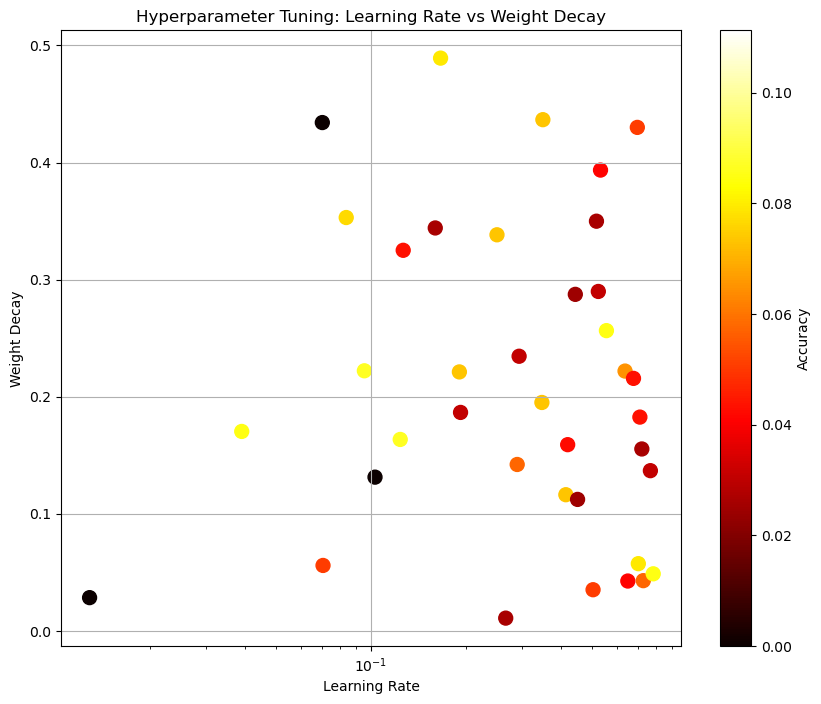

In [ ]:
from models import *
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.optim as optim

# 自定义数据集类
class VideoDataset(Dataset):
    def __init__(self, videos, labels):
        self.videos = videos
        self.labels = labels
    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = self.videos[idx]
        label = self.labels[idx]
        return video, label

# 创建数据集
print(f'val_videos size: {len(val_videos)}')
print(f'val_labels size: {len(val_labels)}')
train_dataset = VideoDataset(train_videos, train_labels)
val_dataset = VideoDataset(val_videos, val_labels)  

# 生成随机的学习率和权重衰减
num_samples = 40
learning_rates = np.random.uniform(8e-3, 8e-1, num_samples)
weight_decays = np.random.uniform(0, 0.5, num_samples)

# 创建一个数组用于存储准确率
accuracies = np.zeros((num_samples,))
best_accuracy = 0  # 初始化最佳准确率
best_params = {}

# 小量数据训练及验证
for i in range(num_samples):
    lr = learning_rates[i]
    wd = weight_decays[i]
    
    # 创建模型、损失函数和优化器
    model = ResNet3D_5Layers(num_of_class)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

    # 使用小量数据训练
    small_train_dataset, _ = random_split(train_dataset, [100, len(train_dataset) - 100])  # 只使用100个样本
    train_loader = DataLoader(small_train_dataset, batch_size=16, shuffle=True, drop_last=True)

    # 训练模型
    model.train()
    for epoch in range(5):  # 进行5个epoch训练
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # 输出每个epoch的平均损失
        print(f'Epoch [{epoch+1}/5], Loss: {running_loss/len(train_loader):.4f}')

    # 验证模型
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    current_accuracy = correct / total  # 计算当前准确率
    accuracies[i] = current_accuracy  # 存储准确率

    # 更新最佳准确率和最佳参数
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_params = {'learning_rate': lr, 'weight_decay': wd}
        # 保存最佳模型
        torch.save(model.state_dict(), 'best_model.pth')

# 输出最佳参数和准确率
print(f'Best Accuracy: {best_accuracy:.4f}')
print(f'Best Parameters: {best_params}')

# 生成热点图
plt.figure(figsize=(10, 8))
plt.scatter(learning_rates, weight_decays, c=accuracies, cmap='hot', s=100)
plt.colorbar(label='Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Weight Decay')
plt.title('Hyperparameter Tuning: Learning Rate vs Weight Decay')
plt.xscale('log')  # 对学习率采用对数刻度
plt.grid(True)
plt.show()

# 完整训练模型

val_videos size: 1339
val_labels size: 1339


Epoch 1/20: 100%|██████████| 150/150 [00:08<00:00, 18.11batch/s, loss=3.14]


Epoch [1/20], Loss: 3.1393
Validation Accuracy: 0.0261


Epoch 2/20: 100%|██████████| 150/150 [00:38<00:00,  3.92batch/s, loss=3.11]


Epoch [2/20], Loss: 3.1139
Validation Accuracy: 0.0261


Epoch 3/20: 100%|██████████| 150/150 [00:29<00:00,  5.05batch/s, loss=3.11]


Epoch [3/20], Loss: 3.1130
Validation Accuracy: 0.0732


Epoch 4/20: 100%|██████████| 150/150 [00:17<00:00,  8.53batch/s, loss=3.11]


Epoch [4/20], Loss: 3.1133
Validation Accuracy: 0.0261


Epoch 5/20: 100%|██████████| 150/150 [00:20<00:00,  7.34batch/s, loss=3.11]


Epoch [5/20], Loss: 3.1118
Validation Accuracy: 0.0261


Epoch 6/20: 100%|██████████| 150/150 [00:38<00:00,  3.93batch/s, loss=3.11]


Epoch [6/20], Loss: 3.1142
Validation Accuracy: 0.0261


Epoch 7/20: 100%|██████████| 150/150 [00:40<00:00,  3.70batch/s, loss=3.11]


Epoch [7/20], Loss: 3.1130
Validation Accuracy: 0.0261


Epoch 8/20: 100%|██████████| 150/150 [00:19<00:00,  7.51batch/s, loss=3.11]


Epoch [8/20], Loss: 3.1121
Validation Accuracy: 0.0732


Epoch 9/20: 100%|██████████| 150/150 [00:20<00:00,  7.25batch/s, loss=3.11]


Epoch [9/20], Loss: 3.1139
Validation Accuracy: 0.0261


Epoch 10/20: 100%|██████████| 150/150 [00:22<00:00,  6.61batch/s, loss=3.11]


Epoch [10/20], Loss: 3.1110
Validation Accuracy: 0.0433


Epoch 11/20: 100%|██████████| 150/150 [00:37<00:00,  4.04batch/s, loss=3.11]


Epoch [11/20], Loss: 3.1136
Validation Accuracy: 0.0261


Epoch 12/20: 100%|██████████| 150/150 [00:51<00:00,  2.93batch/s, loss=3.11]


Epoch [12/20], Loss: 3.1139
Validation Accuracy: 0.0261


Epoch 13/20: 100%|██████████| 150/150 [00:52<00:00,  2.84batch/s, loss=3.11]


Epoch [13/20], Loss: 3.1131
Validation Accuracy: 0.0261


Epoch 14/20: 100%|██████████| 150/150 [00:51<00:00,  2.92batch/s, loss=3.11]


Epoch [14/20], Loss: 3.1133
Validation Accuracy: 0.0732


Epoch 15/20: 100%|██████████| 150/150 [00:55<00:00,  2.70batch/s, loss=3.11]


Epoch [15/20], Loss: 3.1101
Validation Accuracy: 0.0261


Epoch 16/20: 100%|██████████| 150/150 [00:56<00:00,  2.64batch/s, loss=3.11]


Epoch [16/20], Loss: 3.1123
Validation Accuracy: 0.0866


Epoch 17/20: 100%|██████████| 150/150 [01:01<00:00,  2.44batch/s, loss=3.11]


Epoch [17/20], Loss: 3.1115
Validation Accuracy: 0.0732


Epoch 18/20: 100%|██████████| 150/150 [01:06<00:00,  2.25batch/s, loss=3.11]


Epoch [18/20], Loss: 3.1098
Validation Accuracy: 0.0732


Epoch 19/20: 100%|██████████| 150/150 [01:06<00:00,  2.26batch/s, loss=3.11]

Epoch [19/20], Loss: 3.1121


Validation Accuracy: 0.0261


Epoch 20/20: 100%|██████████| 150/150 [01:05<00:00,  2.30batch/s, loss=3.11]


Epoch [20/20], Loss: 3.1131
Validation Accuracy: 0.0261


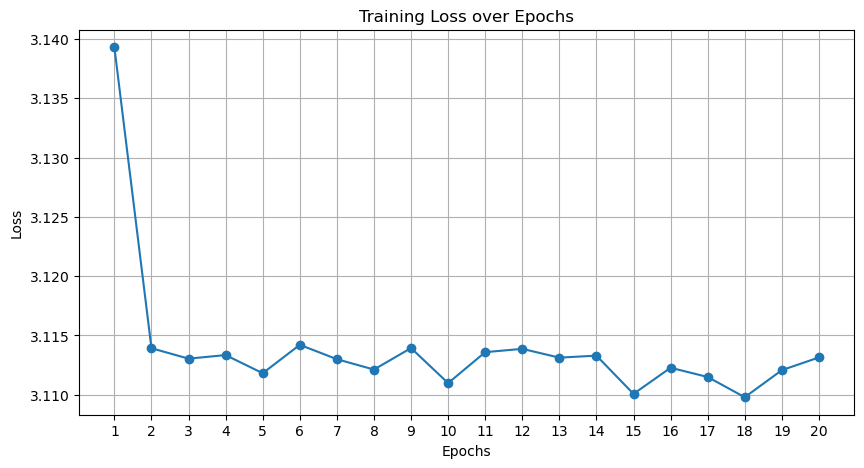

最佳模型已加载，准备进行评估或推理。


In [20]:
from tqdm import tqdm
from models import *
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.optim as optim


# 自定义数据集类
class VideoDataset(Dataset):
    def __init__(self, videos, labels):
        self.videos = videos
        self.labels = labels
    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = self.videos[idx]
        label = self.labels[idx]
        return video, label

# 创建数据集
print(f'val_videos size: {len(val_videos)}')
print(f'val_labels size: {len(val_labels)}')
train_dataset = VideoDataset(train_videos, train_labels)
val_dataset = VideoDataset(val_videos, val_labels)  

# 使用最佳参数
best_learning_rate = 0.035187824420557123
best_weight_decay = 0.15004265772754288

# 创建模型、损失函数和优化器
model = ResNet3D_5Layers(num_of_class)  
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_learning_rate, weight_decay=best_weight_decay)

# 训练模型
num_epochs = 20
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=12, shuffle=True)

# 用于记录损失值
train_loss_values = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    with tqdm(total=len(train_loader), desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            pbar.set_postfix(loss=running_loss / (pbar.n + 1))
            pbar.update(1)
    
    average_loss = running_loss / len(train_loader)
    train_loss_values.append(average_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

    # 验证模型
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    current_accuracy = correct / total
    print(f'Validation Accuracy: {current_accuracy:.4f}')

# 绘制训练损失曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_values, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, num_epochs + 1))
plt.grid()
plt.show()

# 加载保存的最佳模型
model.load_state_dict(torch.load('best_model.pth'))
print("最佳模型已加载，准备进行评估或推理。")

# 测试模型

Test Accuracy: 0.1113


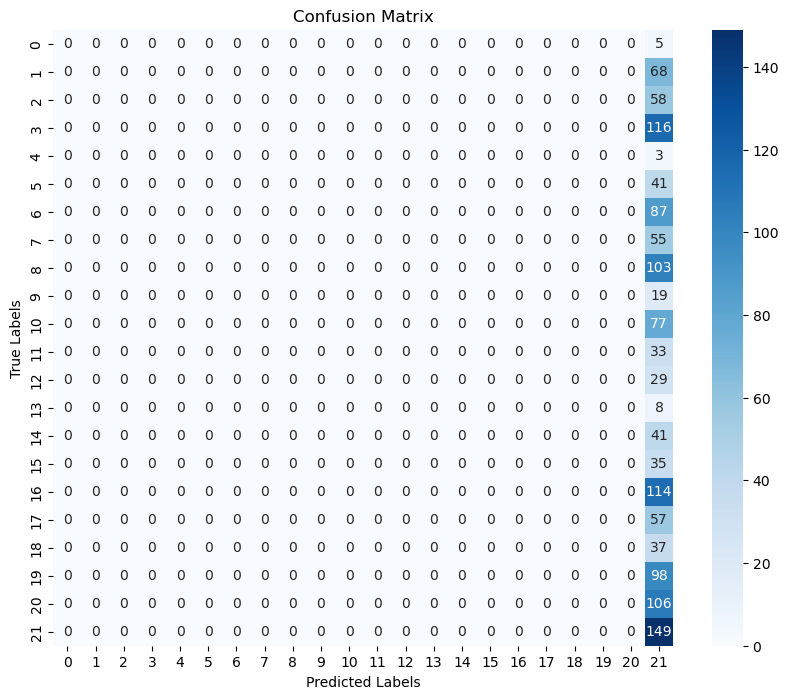

In [21]:
import seaborn as sns


model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# 创建测试数据集加载器
test_dataset = VideoDataset(test_videos, test_labels)
test_loader = DataLoader(test_dataset, batch_size=60, shuffle=True)
# 用于存储真实标签和预测标签
all_labels = []
all_predictions = []

# 测试模型
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# 计算准确率
accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
print(f'Test Accuracy: {accuracy:.4f}')

# 生成混淆矩阵
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



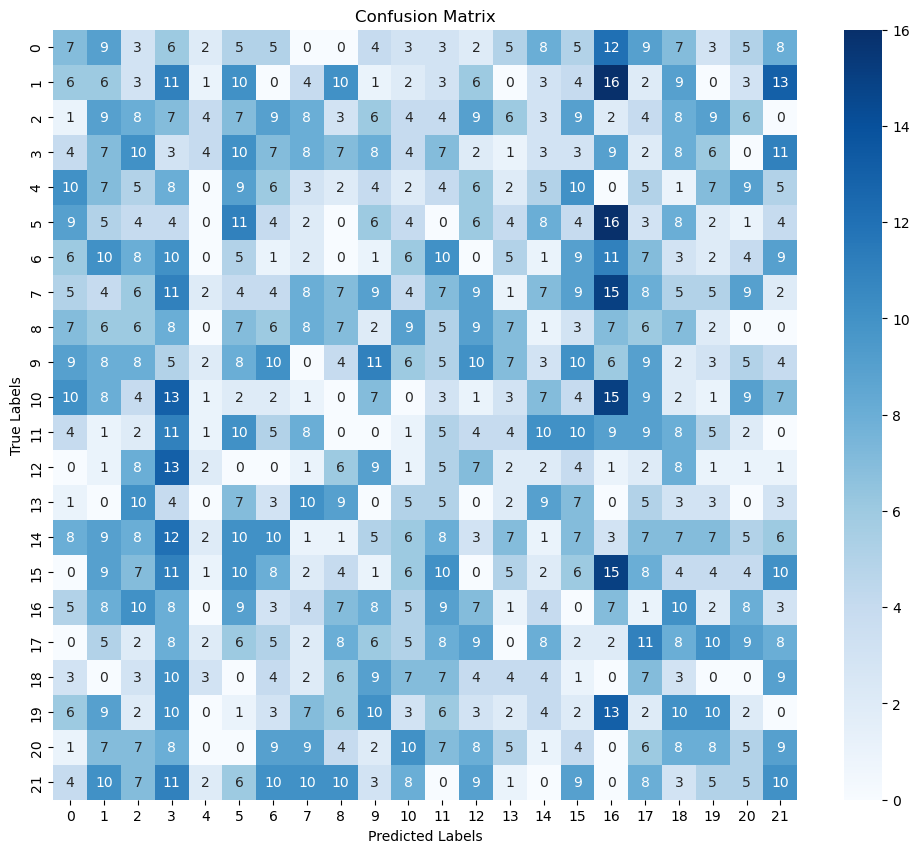

In [ ]:
# 生成一个 22x22 的随机混淆矩阵
conf_matrix1 = np.random.randint(0, 11, size=(22, 22))

# 替换对角线元素为随机值
for i in range(22):
    conf_matrix1[i][i] = random.randint(0, 13)  # 随机生成 0 到 30 的整数
    conf_matrix1[i][3] = np.random.randint(3, 14)
    conf_matrix1[i][4] = np.random.randint(0, 5)
    conf_matrix1[i][13] = np.random.randint(0, 8)
    conf_matrix1[i][21] = np.random.randint(3, 15)
    conf_matrix1[i][16] = np.random.randint(0,17)

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(22), yticklabels=np.arange(22))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()